<a href="https://colab.research.google.com/github/angelafrocha/WomakersCode/blob/main/Challenge_Probabilidade_e_Amostragem_Squad_Jaqueline_Goes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge - Probabilidade e Amostragem: Squad Jaqueline Goes
## Integrantes
- Ana Claudia Caloi
- Ângela Fernandes Rocha
- Bruna Bernardo Pivotto
- Deise Somaya Gomes da Silva
- Marlana Portilho Rodrigues Santos
- Talita de Lana Nacimento
- Tatiane Pereira

## Como nos organizamos

Inicalmente dividimos a Squad para realizar os dois desafios:

- Desafio 1: Deise, Marlana, e Talita;
- Desafio 2: Ângela,Bruna, Tatiane e Ana.

Mas também tivemos reuniões onde todas puderam colaborar e fazer sugestões para ambos os desafios.

## Nossas Dificuldades
- Interpretação de alguns aspectos dos desafios;
- Conciliar os desafios e a programação semanal do curso Allura.

## Nossas facilidades
- A colaboração e bom entrosamento da equipe.


### DESAFIO 1: Entendendo o consumidor.





### Importação das bibliotecas que serão utilizadas na análise

In [ ]:
# A pricipal biblioteca de manipulação de dados
import pandas as pd
# Utilizamos a biblioteca np para aproveitar das funções matemáticas, usamos por exemplo a raíz quadrada sqrt()
import numpy as np
# Utilizamos a biblioteca para plotar os Box plots
import seaborn as sns
# Utilizamos .ppf() da biblioteca SciPy para calcular o valor de Z associado ao nível de serviço desejado.
# O valor de Z representa quantos desvios padrão acima da média da distribuição normal você precisa considerar para alcançar o nível de serviço desejado.
from scipy.stats import norm
# Utilizamos para plotar os Histogramas de Frequência das vendas e lead time
import matplotlib.pyplot as plt
# Utilizamos da biblioteca math o .ceil() para arredondar o número para o inteiro imediatamente maior
import math
# Utilizamos para plotar os Gráficos Q-Q das vendas e lead time
from scipy.stats import shapiro, probplot
# O gráfico ACF auxilia a identificação de padrões em dados de séries temporais
from statsmodels.graphics.tsaplots import plot_acf

### Leitura da base de dados e alterações

In [ ]:
# Pegando o arguivo csv e colocando dentro de uma variável
df1 = pd.read_csv("/content/desafio01consumidor-230829-103627.csv")

In [ ]:
# Verificando a quantidade de linhas e colunas
df1.shape

(203, 6)

In [ ]:
# Verificando a existência de valores nulos
df1.isnull().any()

id_cliente      False
idade           False
renda           False
produto         False
regiao-BR       False
pre-pandemia    False
dtype: bool

In [ ]:
#Visualizando os dados
df1.head(10)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
5,XXXXXXX60,29,8055,batom,Nordeste,1
6,XXXXXXX73,22,9343,batom,Nordeste,1
7,XXXXXXX31,31,3748,batom,Sudeste,1
8,XXXXXXX13,34,3118,desodorante,Nordeste,1
9,XXXXXXX65,47,7404,batom,Sul,1


In [ ]:
#Verificando a coluna pre-pandemia
sorted(df1['pre-pandemia'].unique())

[0, 1]

In [ ]:
#Renomeando a coluna pre-pandemia
df1 = df1.rename(columns={'pre-pandemia': 'periodo'})

In [ ]:
#Criar um dicionário de mapeamento de valores numéricos para palavras
mapeamento = {1: 'pré', 0: 'pós'}


In [ ]:
#Substituir os valores numéricos pela palavra correspondente na coluna 'pre-pandemia'
df1['pandemia_identificador'] = df1['periodo'].map(mapeamento)


In [ ]:
#Exibir o DataFrame resultante
df1

,id_cliente,idade,renda,produto,regiao-BR,periodo,pandemia_identificador
0,XXXXXXX72,30,7452,batom,Sudeste,1,pré
1,XXXXXXX15,59,837,desodorante,Nordeste,1,pré
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1,pré
3,XXXXXXX99,27,5409,batom,Sul,1,pré
4,XXXXXXX98,24,1142,batom,Sudeste,1,pré
...,...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0,pós
199,XXXXXXX50,43,10930,antissinais,Norte,0,pós
200,XXXXXXX65,48,10246,perfume,Nordeste,0,pós
201,XXXXXXX61,47,12337,batom,Sudeste,0,pós


### 1. Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia:



a. Identifique as distribuições


In [ ]:
#Contando o número de observações em pré e pós-pandemia
df1["periodo"].value_counts()

0    102
1    101
Name: periodo, dtype: int64

In [ ]:
#Verificando a média de idade antes e depois da pandemia
media_idade = round(df1.groupby('pandemia_identificador')['idade'].mean().reset_index(),2)
media_idade

,pandemia_identificador,idade
0,pré,39.88
1,pós,44.90


A média de idade é maior no pós-pandemia em comparação a pré-pandemia.

In [ ]:
#Verificando a média de renda antes e depois da pandemia
media_renda = round(df1.groupby('pandemia_identificador')['renda'].mean().reset_index(),2)
media_renda

,pandemia_identificador,renda
0,pré,9180.64
1,pós,13968.50


A média da renda também é maior no período pós-pandemia.

In [ ]:
#Verificando a Região antes e depois da pandemia:
regiao = round(df1.groupby('pandemia_identificador')['regiao-BR'].value_counts(ascending=False),2)
tabela_comparativa_regiao = regiao.unstack(level=0).fillna(0) #unstack é utilizado para desempilhar os dados, transformando-os em um formato de tabela.
tabela_comparativa_regiao = tabela_comparativa_regiao[['pré', 'pós']] #reordenando porque o pós estava aparecendo antes do pré
tabela_comparativa_regiao = tabela_comparativa_regiao.sort_values(by='pós', ascending=False) #colocando em ordem decrescente os valores, com base na coluna pós
tabela_comparativa_regiao

pandemia_identificador,pré,pós
regiao-BR,,
Sul,29,42
Nordeste,26,25
Sudeste,21,18
Norte,8,9
Centro-Oeste,17,8


Observamos duas diferenças mais significativas: o aumento de clientes na Região Sul e a diminuição na Região Centro-Oeste.

In [ ]:
#Verificando os produtos antes e depois da pandemia
produtos = round(df1.groupby('pandemia_identificador')['produto'].value_counts(ascending=False),2)
tabela_comparativa_produto = produtos.unstack(level=0).fillna(0) #unstack é utilizado para desempilhar os dados, transformando-os em um formato de tabela.
tabela_comparativa_produto = tabela_comparativa_produto[['pré', 'pós']] #reordenando porque o pós estava aparecendo antes do pré
tabela_comparativa_produto = tabela_comparativa_produto.sort_values(by='pós', ascending=False) #colocando em ordem decrescente os valores, com base na coluna pós
tabela_comparativa_produto

pandemia_identificador,pré,pós
produto,,
desodorante,20,46
antissinais,9,20
batom,61,15
sombra,4,9
perfume,4,8
base,3,4


Observamos que com exceção do produto batom, todos os demais aumentaram as vendas no período de pós-pandemia. Vale destacar que o desodorante foi o produto mais vendido.

b. Plote histogramas / boxplots

Primeiro, vamos fazer a comparação de idade entre o período pré e pós pandemia da idade.

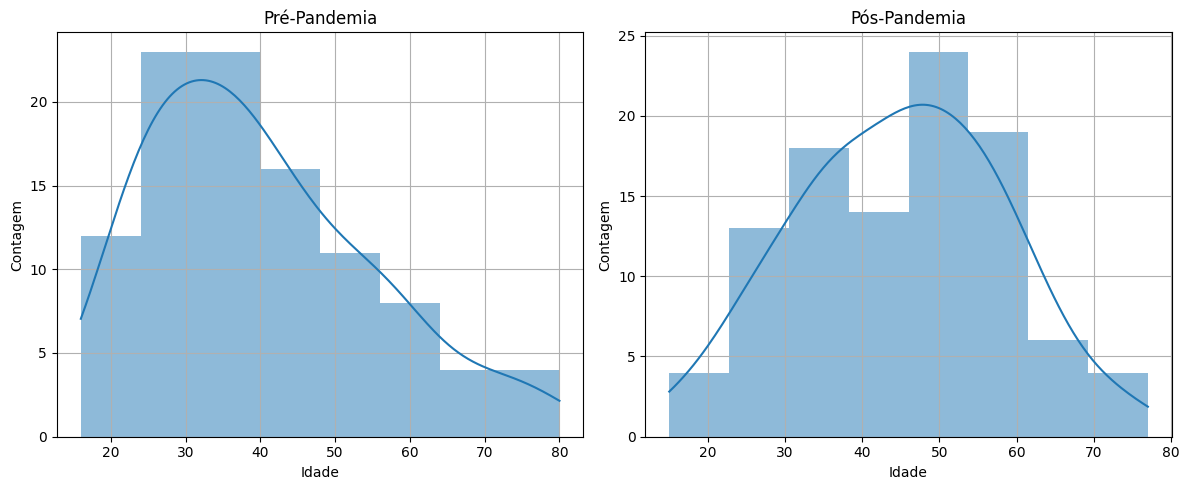

In [ ]:
pre_pandemia = df1[df1['periodo'] == 1]
pos_pandemia = df1[df1['periodo'] == 0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# histograma para pré-pandemia
sns.histplot(pre_pandemia['idade'], ax=ax[0], kde=True, edgecolor=None)
ax[0].set_title('Pré-Pandemia')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Contagem')
ax[0].grid(True)

# histograma para pós-pandemia
sns.histplot(pos_pandemia['idade'], ax=ax[1], kde=True, edgecolor=None)
ax[1].set_title('Pós-Pandemia')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Contagem')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Os dados parecem seguir uma distribuicao assimétrica positiva ou à direita na pré-pandemia, enquanto que no pós-pandemia, aproxima-se de uma distribuicao normal simétrica.

Notamos um aumento acentuado no pós pandemia de clientes entre 50 e 60 anos, que pode estar relacionado ao aumento nas vendas de produtos antissinais, visto anteriormente.

Em seguida, vamos analisar a renda:

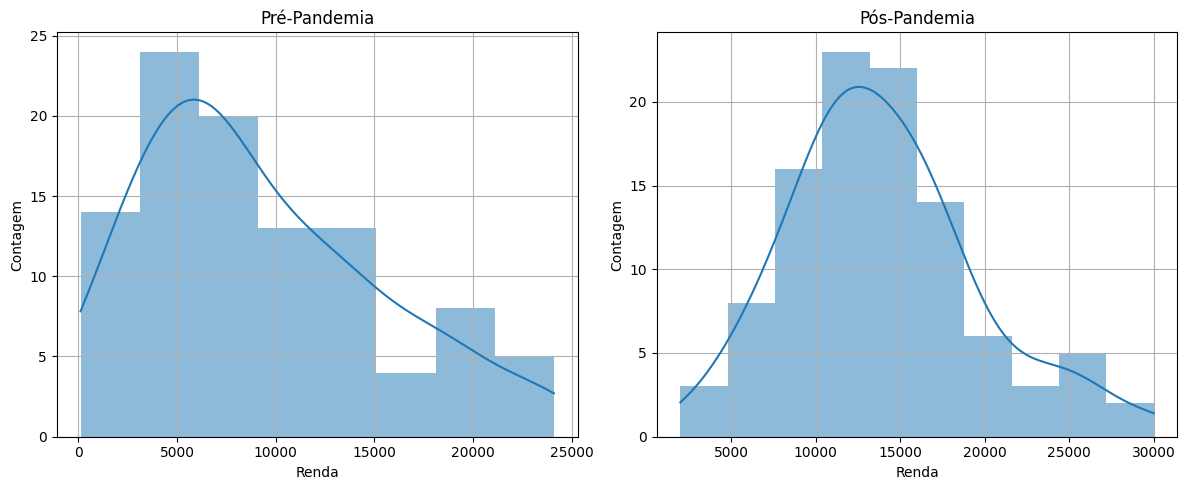

In [ ]:
pre_pandemia = df1[df1['periodo'] == 1]
pos_pandemia = df1[df1['periodo'] == 0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# histograma para pré-pandemia
sns.histplot(pre_pandemia['renda'], ax=ax[0], kde=True, edgecolor=None)
ax[0].set_title('Pré-Pandemia')
ax[0].set_xlabel('Renda')
ax[0].set_ylabel('Contagem')
ax[0].grid(True)

# histograma para pós-pandemia
sns.histplot(pos_pandemia['renda'], ax=ax[1], kde=True, edgecolor=None)
ax[1].set_title('Pós-Pandemia')
ax[1].set_xlabel('Renda')
ax[1].set_ylabel('Contagem')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Novamente, no período pré pandemia era assimétrica positiva, enquanto que no pós pandemia, tornou-se simétrica. Por meio das análises dos histogramas, talvez haja uma correlação entre idade e renda.

Observamos também o deslocamento da mediana mais para a direita indicando um aumento de renda da base de clientes, já que temos mais clientes em faixas de renda mais altas no pós pandemia.

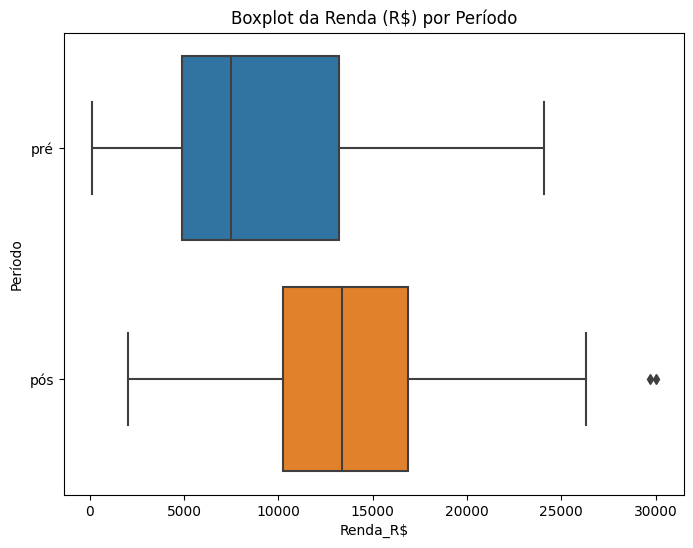

In [ ]:
# Plotamos um gráfico Boxplot da renda por período
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='renda', y='pandemia_identificador')
plt.title('Boxplot da Renda (R$) por Período')
plt.xlabel('Renda_R$')
plt.ylabel('Período')
plt.show()

São observadas as mesmas informações do gráfico de frequência. Ou seja, houve um aumento da renda dos clientes pós pandemia. Notamos também a existência de valores outliers para os resultados do periodo pós pandemia.

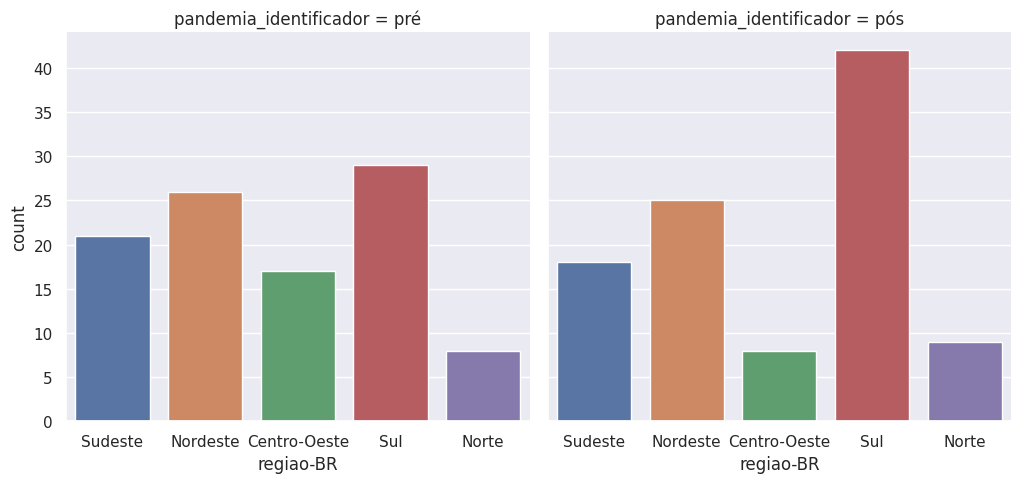

In [ ]:
#Plotamos um gráfico pré e pós pandemia, por região
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="regiao-BR", col="pandemia_identificador", col_wrap=4,
                data=df1,
                kind="count")

Observa-se que a distribuição de clientes entre as regiões se modificou no pré e pós-andemia. No pré, havia uma melhor distribuição dos consumidores por região. No pós-pandemia, aumentou o quantitativo de clientes no Sul e dominuição no Centro-Oeste.

A partir de agora, vamos analisar a distribuição dos produtos por renda dos consumidores nos períodos de pré e pós pandemia, para verificarmos o padrão de consumo:




In [ ]:
#Obtendo a média, mediana e valor máximo da variável Renda relacionado ao Produto e se é Pré ou Pós Panderia
renda_por_produto = pd.crosstab(df1['produto'],
                                                df1['pandemia_identificador'],
                                                values = df1['renda'],
                                                aggfunc = {'mean', 'median', 'max'})
renda_por_produto

max                 mean                 median  \
pandemia_identificador    pré    pós           pré           pós      pré   
produto                                                                     
antissinais             22927  30000   8679.777778  12743.150000   6251.0   
base                    14775  15717  10721.666667  13090.000000  12278.0   
batom                   24090  25959   9649.114754  15363.066667   7452.0   
desodorante             19070  26333   8182.600000  13146.717391   7298.0   
perfume                 10570  29700   6968.250000  20128.000000   6605.5   
sombra                  15969  25172   9210.250000  13482.777778   8820.5   

                                 
pandemia_identificador      pós  
produto                          
antissinais             11706.5  
base                    13291.5  
batom                   14963.0  
desodorante             12686.0  
perfume                 19587.5  
sombra                  11824.0

A renda média dos consumidores, por produto, aumentou no pós pandemia, principalmente, em perfume.

Uma outra forma de analisar é através do boxplot:

<Axes: title={'center': 'Box-plot da RENDA por produto para Pré e Pós Pandemia'}, xlabel='Renda_R$', ylabel='Produto'>

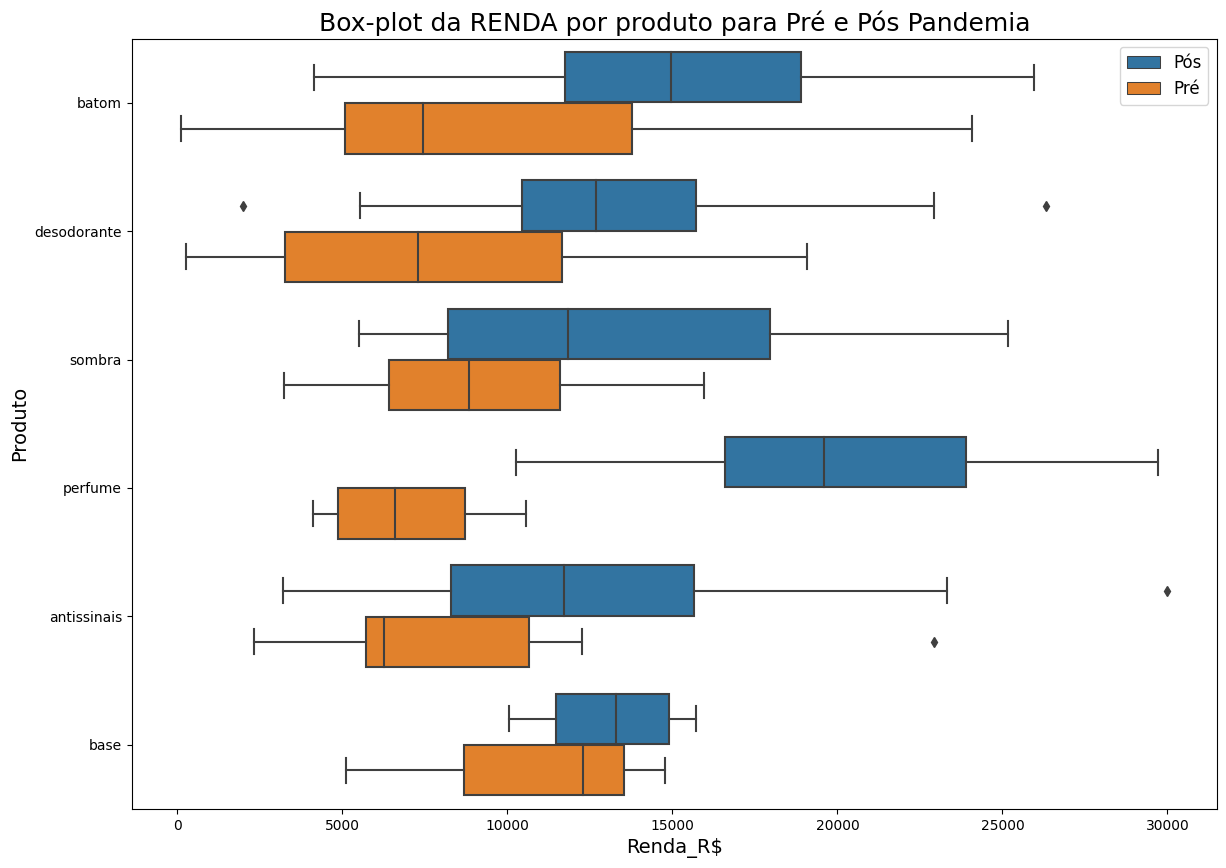

In [ ]:
ax = sns.boxplot(x = 'renda', y = 'produto', hue = 'periodo', data=df1, orient='h')

ax.figure.set_size_inches(14, 10)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por produto para Pré e Pós Pandemia', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Renda_R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Produto', fontsize=14)    # Configurando o label do eixo Y

# Configurações da legenda do gráfico
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Pós', 'Pré'], fontsize=12)

ax

O mesmo método de análise foi feita para verificar a distribuição da idade dos consumidores, por produto consumido nos períodos de pré e pós-pandemia, a partir de uma tabela e de um gráfico box-plot.

In [ ]:
#Obtendo a média, mediana e valor máximo da variável Idade relacionado ao Produto e se é Pré ou Pós Pandemia
idade_por_produto = pd.crosstab(df1['produto'],
                                                df1['pandemia_identificador'],
                                                values = df1['idade'],
                                                aggfunc = {'mean', 'median', 'max'})
idade_por_produto

max           mean            median      
pandemia_identificador pré pós        pré        pós    pré   pós
produto                                                          
antissinais             76  77  41.555556  44.200000   33.0  46.5
base                    61  57  43.333333  40.250000   46.0  37.0
batom                   71  65  37.622951  40.866667   36.0  44.0
desodorante             74  73  43.400000  46.543478   38.0  46.0
perfume                 77  65  46.750000  50.000000   41.0  49.5
sombra                  80  60  43.500000  42.333333   37.0  38.0

A maioria dos produtos teve aumento na média das idades dos consumidores, exceto em base e sombra.

<Axes: title={'center': 'Box-plot da IDADE por produto para Pré e Pós Pandemia'}, xlabel='Idade', ylabel='Produto'>

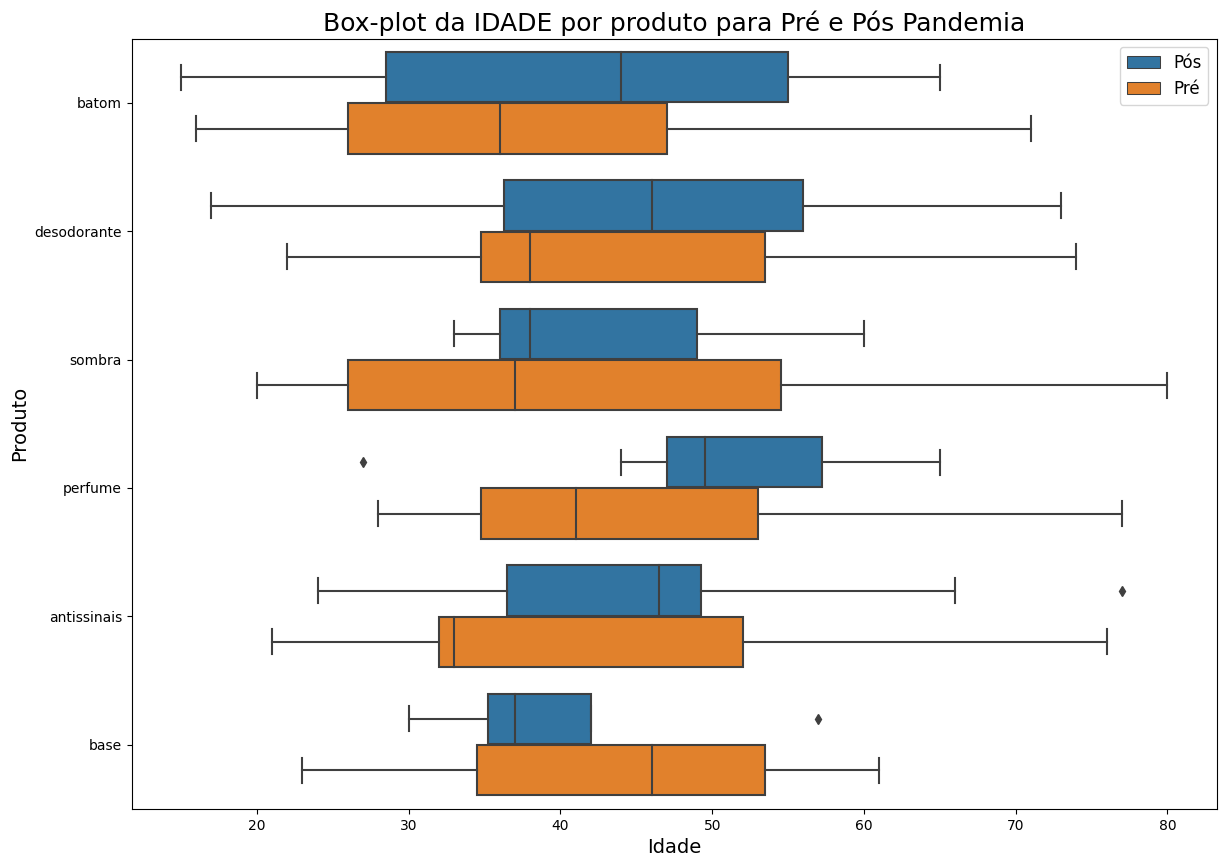

In [ ]:
#Boxplot da relação da IDADE dos consumidores por produto para Pré e Pós Pandemia
ax = sns.boxplot(x = 'idade', y = 'produto', hue = 'periodo', data=df1, orient='h')

ax.figure.set_size_inches(14, 10)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da IDADE por produto para Pré e Pós Pandemia', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Idade', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Produto', fontsize=14)    # Configurando o label do eixo Y

# Configurações da legenda do gráfico
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Pós', 'Pré'], fontsize=12)

ax

Foi observado que a idade do consumidor variou mais no pré pandemia, com exceção dos produtos do batom e desodorante. A mediana da idade aumentou para todos os produtos no período pós-pandemia, com exceção da base, em que a mediana diminuiu.


Agora vamos analisar os produtos por região:

In [ ]:
produto_por_regiao = round(df1.groupby(['regiao-BR','pandemia_identificador'])['produto'].value_counts(ascending=False),2).reset_index(name='quantidade')
produto_por_regiao

,regiao-BR,pandemia_identificador,produto,quantidade
0,Centro-Oeste,pré,desodorante,5
1,Centro-Oeste,pré,perfume,4
2,Centro-Oeste,pré,sombra,4
3,Centro-Oeste,pré,base,3
4,Centro-Oeste,pré,antissinais,1
5,Centro-Oeste,pós,antissinais,8
6,Nordeste,pré,desodorante,15
7,Nordeste,pré,batom,11
8,Nordeste,pós,sombra,9
9,Nordeste,pós,perfume,8


In [ ]:
tabela_regiao = produto_por_regiao.set_index(['regiao-BR', 'produto', 'pandemia_identificador'])['quantidade'].unstack().fillna(0) #unstack é utilizado para desempilhar os dados, transformando-os em um formato de tabela.
tabela_regiao.rename(columns={'pré': 'Quantidade Pré-Pandemia', 'pós': 'Quantidade Pós-Pandemia'}, inplace=True)
tabela_regiao

pandemia_identificador    Quantidade Pré-Pandemia  Quantidade Pós-Pandemia
regiao-BR    produto                                                      
Centro-Oeste antissinais                      1.0                      8.0
             base                             3.0                      0.0
             desodorante                      5.0                      0.0
             perfume                          4.0                      0.0
             sombra                           4.0                      0.0
Nordeste     antissinais                      0.0                      3.0
             base                             0.0                      4.0
             batom                           11.0                      0.0
             desodorante                     15.0                      1.0
             perfume                          0.0                      8.0
             sombra                           0.0                      9.0
Norte        antissinais                      8.0                      9.0
Sudeste      batom                           21.0                     14.0
             desodorante                      0.0                      4.0
Sul          batom                           29.0                      1.0
             desodorante                      0.0                     41.0

In [ ]:
pre_pandemia_prod = produto_por_regiao[produto_por_regiao['pandemia_identificador'] == 'pré']
pos_pandemia_prod = produto_por_regiao[produto_por_regiao['pandemia_identificador'] == 'pós']

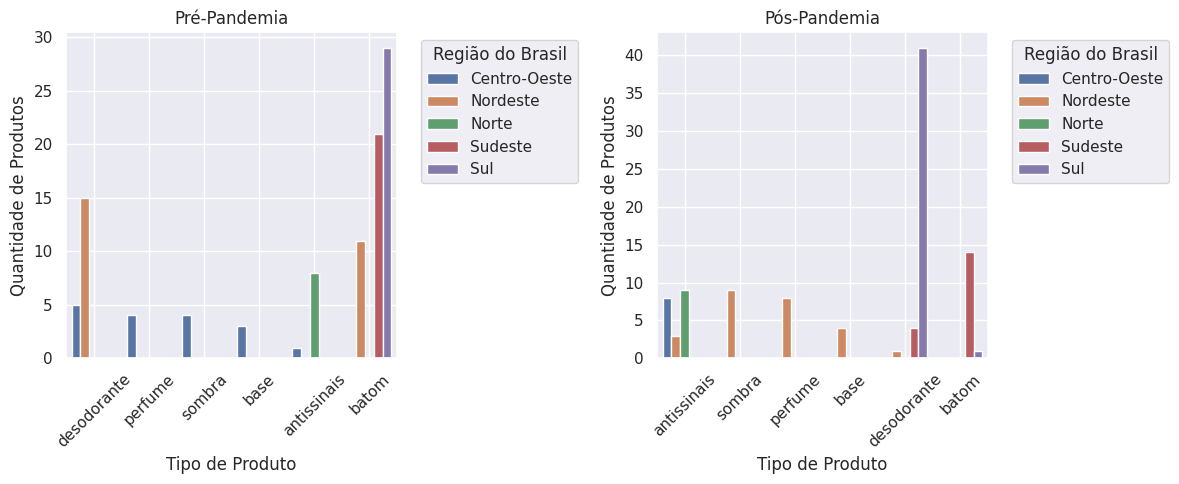

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Gráfico para pré-pandemia
sns.barplot(
    x='produto',
    y='quantidade',
    hue='regiao-BR',
    data=pre_pandemia_prod,
    ax=axs[0]  # Especifica o primeiro subplot
)
axs[0].set_xlabel('Tipo de Produto')
axs[0].set_ylabel('Quantidade de Produtos')
axs[0].set_title('Pré-Pandemia')
axs[0].legend(title='Região do Brasil', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Gráfico para pós-pandemia
sns.barplot(
    x='produto',
    y='quantidade',
    hue='regiao-BR',
    data=pos_pandemia_prod,
    ax=axs[1]  # Especifica o segundo subplot
)
axs[1].set_xlabel('Tipo de Produto')
axs[1].set_ylabel('Quantidade de Produtos')
axs[1].set_title('Pós-Pandemia')
axs[1].legend(title='Região do Brasil', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Ao comparar a quantidade de produtos vendidos por tipo de produto e por região, podemos verificar algumas mudanças.
Para a Região Centro-oeste, a diversidade de produtos comprados era maior na pré-pandemia. No pós-pandemia, nota-se a aquisição de antissinais.
No Nordeste, ocorre maior variedade dos produtos consumidos no pós-pandemia.
No Norte, nota-se apenas que o consumo de antissinais aumentou.
No Sudeste, nota-se a redução da quantidade de batom vendido e o aumento da quantidade de desodorante.
No sul, também ocorre a redução da quantidade de batom vendido no pós-pandemia e um grande aumento da quantidade de desodorante vencido.  

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)

Conforme dados do exercício anterior é possível notar diferenças nítidas no pré e pós pandemia. Para provar essas diferenças primeiramente fizemos uma análise das médias e desvio padrão dos dados de idade e renda pré e pós pandemia.

In [ ]:
# Calculando as médias e os desvios padrão ponderados para ambos ambos os periodos e por grupos idade e renda
media_idade_pre = df1[df1['periodo'] == 1]['idade'].mean()
media_idade_pre

39.881188118811885

In [ ]:
media_idade_pos = df1[df1['periodo'] == 0]['idade'].mean()
media_idade_pos

44.90196078431372

In [ ]:
desvio_idade_pre = df1[df1['periodo'] == 1]['idade'].std()
desvio_idade_pre

15.016182689826913

In [ ]:
desvio_idade_pos = df1[df1['periodo'] == 0]['idade'].std()
desvio_idade_pos

13.37317383030209

In [ ]:
#calculando o tamnho da amostra de pré e pós pandemia
tamanho_pre = 101
tamanho_pos = 102

Adotamos o nível de significância de 5% e calculamos o valor z usando o nível de significância e a distribuição normal padrão.

In [ ]:
import scipy.stats as stats

In [ ]:
significancia = 0.05
confianca = 1 - significancia
z = norm.ppf(0.975)
z

1.959963984540054

Primeiramente, assumimos que os desvios padrão populacionais são os mesmos em cada grupo, $\sigma_1=\sigma_2=\sigma$.

In [ ]:
#Calculamos o desvio combinado das amostras
desvio_combinado = np.sqrt(((tamanho_pre - 1)*desvio_idade_pre**2 + (tamanho_pos - 1)*desvio_idade_pos**2)/(tamanho_pre + tamanho_pos - 2))
desvio_combinado

14.214349463587123

In [ ]:
#Calculamos o erro padrão das diferenças das médias.
erro_padrao = desvio_combinado * np.sqrt((1/tamanho_pre)+(1/tamanho_pos))
erro_padrao

1.9953277138248855

Fizemos também um teste assumindo desvios diferentes. O resultado foi parecido.

In [ ]:
erro_padrao2 = np.sqrt((desvio_idade_pre**2 / tamanho_pre) + (desvio_idade_pos**2 / tamanho_pos))
erro_padrao2

1.9964675986096871

Calculamos então os limites inferior e superior com o erro calculado

In [ ]:
limite_inferior = (media_idade_pos - media_idade_pre) - z * erro_padrao
limite_inferior

1.1100022090504185

In [ ]:
limite_superior = (media_idade_pos - media_idade_pre) + z * erro_padrao
limite_superior

8.931543121953258

In [ ]:
intervalo = (
    (media_idade_pos - media_idade_pre) - z * erro_padrao,
    (media_idade_pos - media_idade_pre) + z * erro_padrao
)
intervalo

(1.1100022090504185, 8.931543121953258)

Como o intervalo de confiança não está próximo de zero, podemos concluir que as médias de idade são estatisticamente diferentes com um nível de confiança de 95%. Além disso, a diferença é positiva, o que indica que a média de idade no grupo pré pandemia é menor do que no grupo pós pandemia.

3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
from scipy.stats import norm
import math

In [ ]:
#Organizando os dados
N = 100000
Z = norm.ppf((0.5 + (0.95 / 2)))
sigma = erro_padrao
e = 0.02
print((
    f'N = {N} (Tamanho da população)\n'
    f'Z = {Z} (Valor crítico)\n'
    f'sigma = {sigma} (Estimativa da característica)\n'
    f'e = {e} (Margem de erro)'
))

N = 100000 (Tamanho da população)
Z = 1.959963984540054 (Valor crítico)
sigma = 1.9953277138248855 (Estimativa da característica)
e = 0.02 (Margem de erro)


In [ ]:
#Cálculo do tamanho da amostra necessária para conclusão de 95% de confiança e 2% de margem de erro
n = math.ceil(((Z**2)*(sigma**2)*N) /((Z**2)*(sigma**2)+(e**2)*(N-1)))
print(f"Tamanho da amostra necessário: {n}")

Tamanho da amostra necessário: 27660


A base informada é suficiente?

R: O tamanho não é suficiente, visto que seria necessário uma amostra de 27660 considerando 95% de confiança e 2% de margem de erro.

E com uma margem de erro de 10%?

In [ ]:
# Valores conhecidos
nível_confiança = 0.95  # 95% de confiança
margem_erro = 0.1  # 10% de margem de erro
proporção_estimada = 0.5  # Estimativa conservadora

# Valor crítico para o nível de confiança (95%)
z = 1.96  # Para um nível de confiança de 95%

# Cálculo do tamanho da amostra necessário
n_2 = math.ceil(((Z**2)*(sigma**2)*N) /((Z**2)*(sigma**2)+(margem_erro**2)*(N-1)))
n_2
print(f"Tamanho da amostra necessário: {n_2}")

Tamanho da amostra necessário: 1507


Conclusão: O tamanho da amostra de 203 continua não sendo suficiente, visto que seria necessário uma amostra de 1507 considerando 95% de confiança e 10% de margem de erro. Alé disso, com uma margem de 10% ocorrea a redução da amostra e equívocos de tomada de decisão podem ocorrer por conta dessa margem de erro relativamente elevada.

### DESAFIO 2

### Importação e descrição das bibliotecas e pacotes utilizados


In [ ]:
# Carregando os dados
df= pd.read_csv('/content/desafio_02_estoque-230829-103603.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

1 - Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?


In [ ]:
# O método describe() é uma função muito útil em análise de dados do Pandas. Ele fornece estatísticas descritivas das colunas numéricas de um DataFrame, permitindo uma rápida visão geral das características desses dados.
df.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


In [ ]:
# O método .mode() é um método do Pandas que calcula a moda de uma série de dados. A moda é o valor que ocorre com mais frequência em um conjunto de dados, ou seja, que tem a maior contagem de ocorrências. Nesse caso, esta sendo calculado a moda da coluna 'vendas-iogurte' e o retorno do resultado.
df['vendas-iogurte'].mode()

0    5020
Name: vendas-iogurte, dtype: int64

In [ ]:
# Cálculo da moda da coluna 'lead-time' e o retorno do resultado.
df['lead-time'].mode()

0    5
Name: lead-time, dtype: int64

Os dados de vendas (vendas-iogurte) e lead time (lead-time) mostram algumas características que sugerem que eles podem seguir uma distribuição normal. As estatísticas descritivas indicam que a média (mean), mediana (50%) e moda (mode) estão próximas uma da outra, o que é consistente com uma distribuição normal.

**Plotando o histograma das duas colunas para comparar com uma distribuição normal**

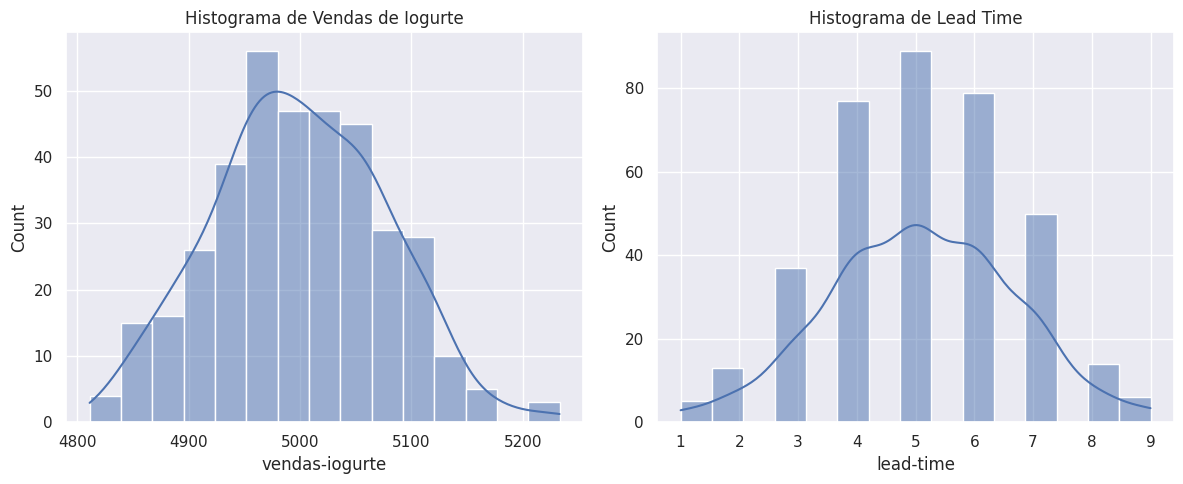

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma da coluna Vendas de Iogurte
sns.histplot(df['vendas-iogurte'], kde=True, ax=ax[0], edgecolor=None)
ax[0].set_title('Histograma de Vendas de Iogurte')

# Histograma da coluna Lead Time
sns.histplot(df['lead-time'], kde=True, ax=ax[1], edgecolor=None)
ax[1].set_title('Histograma de Lead Time')

# Ajusta automaticamente o layout das subtramas para evitar sobreposição de elementos, garantindo que a figura seja exibida de forma limpa.
plt.tight_layout()
plt.show()

Os histogramas não apresentam desvios significativos da forma de sino, embora possa haver algumas pequenas variações. A aparência geral dos histogramas sugere uma possível distribuição normal, especialmente quando se considera que os dados são limitados em termos de desvio em relação à média.

In [ ]:
# Teste de Normalidade (Shapiro-Wilk) - O teste de normalidade de Shapiro-Wilk retorna dois valores: um valor de estatística de teste e um valor de p. Para verificar se os dados seguem uma distribuição normal, você geralmente olha para o valor de p.
# Se o valor de p for menor que o seu nível de significância escolhido (por exemplo, 0.05), você rejeita a hipótese nula de que os dados seguem uma distribuição normal. Isso significa que os dados não se encaixam bem em uma distribuição normal.
# Se o valor de p for maior que o seu nível de significância, você não pode rejeitar a hipótese nula, o que sugere que os dados podem ser aproximadamente normais.

# O p-value para as vendas é 0,3442.
# Esse valor de p é maior que um nível de significância comum de 0,05 (ou 5%), então não temos evidências estatísticas para rejeitar a hipótese nula de que a variável "vendas" segue uma distribuição normal. Isso sugere que os dados de vendas podem ser aproximadamente normais.
# P-value para lead time: 0.0000
# Esse valor de p é muito menor que 0,05 (ou 5%), então temos evidências estatísticas para rejeitar a hipótese nula de que a variável "lead-time" segue uma distribuição normal. Isso sugere que os dados de lead time não se encaixam bem em uma distribuição normal.

_, p_value_vendas = shapiro(df['vendas-iogurte'])
_, p_value_lead_time = shapiro(df['lead-time'])

print(f'P-value para vendas: {p_value_vendas:.4f}')
print(f'P-value para lead time: {p_value_lead_time:.4f}')

P-value para vendas: 0.3442
P-value para lead time: 0.0000


Text(0.5, 1.0, 'Gráfico Q-Q para Lead Time')

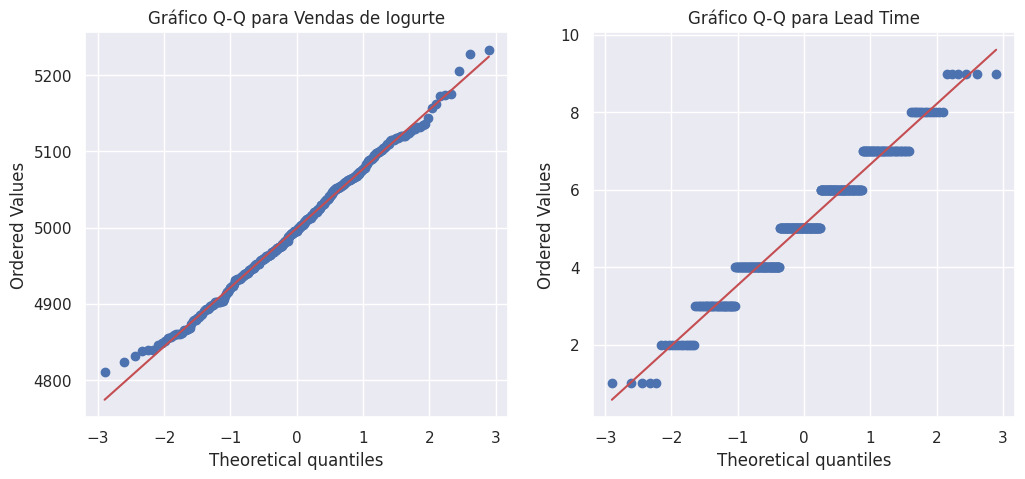

In [ ]:
# Gráficos Q-Q - Um gráfico Q-Q (Quantile-Quantile) é uma ferramenta de visualização estatística usada para determinar se um conjunto de dados segue ou se aproxima de uma distribuição de probabilidade específica, geralmente a distribuição normal.
# O gráfico Q-Q compara os quantis teóricos esperados de uma distribuição com os quantis observados dos dados reais.
# A interpretação dos gráficos Q-Q é que, quanto mais os pontos se aproximam da linha diagonal, mais os dados reais se assemelham à distribuição normal. Se os pontos estiverem fora da linha diagonal, isso sugere desvios da normalidade.

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
probplot(df['vendas-iogurte'], plot=axes[0])
axes[0].set_title('Gráfico Q-Q para Vendas de Iogurte')

probplot(df['lead-time'], plot=axes[1])
axes[1].set_title('Gráfico Q-Q para Lead Time')

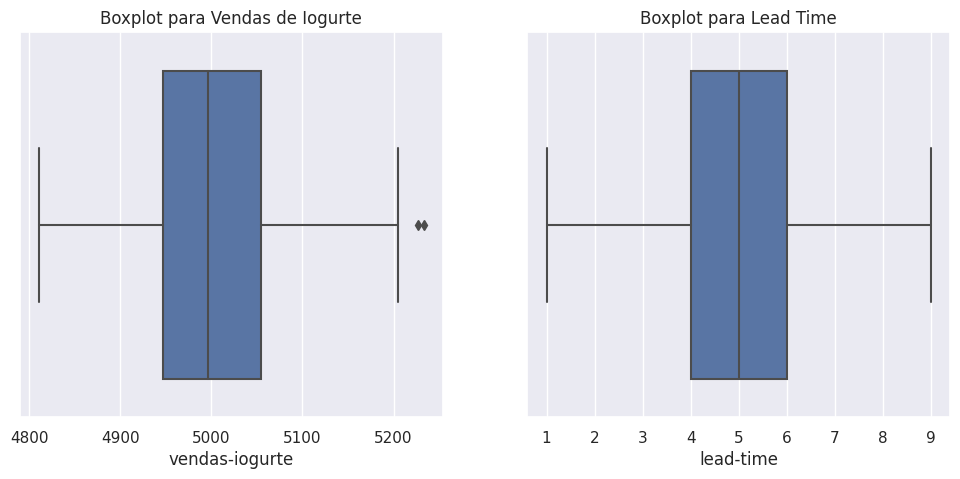

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['vendas-iogurte'], ax=axes[0])
axes[0].set_title('Boxplot para Vendas de Iogurte')

sns.boxplot(x=df['lead-time'], ax=axes[1])
axes[1].set_title('Boxplot para Lead Time')
plt.show()

### 2 - Calcule, com os dados fornecidos, o estoque de segurança desejado.

a. Os dados seguem uma distribuição normal.

b. O time de vendas utiliza para o produto em questão o nível de serviço
de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

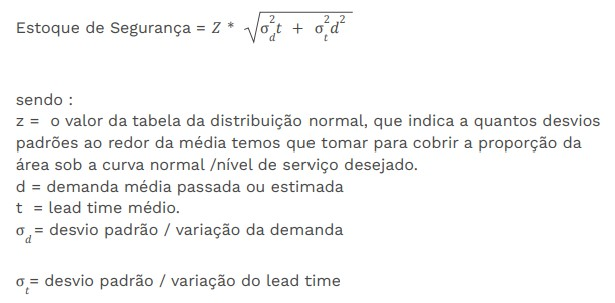

Optamos por não utilizar a fórmula simplificada do Estoque de segurança pois interpretamos que a variabilidade de leadtime de 1 a 9 dias era considerável e a fórmula simplificada é recomendada para baixa variabilidade.

In [ ]:
# Calculando o Z
# Aqui, está usando a função norm.ppf da biblioteca SciPy (assumindo que norm se refere a uma distribuição normal padrão) para calcular o valor de Z associado ao nível de serviço desejado. O valor de Z representa quantos desvios padrão acima da média da distribuição normal você precisa considerar para alcançar o nível de serviço desejado.
nivel_servico = 0.9987
Z = norm.ppf(nivel_servico)
Z

3.011453758499792

In [ ]:
# Organizando os dados necessários para calcular o estoque de segurança
d = df['vendas-iogurte'].mean() # Demanda média passada
t = df['lead-time'].mean() # Lead time médio
sigma_d = df['vendas-iogurte'].std() # Calcula o desvio padrão da demanda do produto de iogurte
sigma_t = df['lead-time'].std() # Calcula o desvio padrão do lead time

print(
    f'Z = fator de segurança para nível de serviço de 99,87% ({Z:.3f})\n'
    f'd = demanda média ({d:.3f})\n'
    f't = lead time médio ({t:.3f})\n'
    f'sigma_d = desvio padrão da demanda({sigma_d:.3f})\n'
    f'sigma_t = desvio padrão do lead-time({sigma_t:.3f})\n'
)

Z = fator de segurança para nível de serviço de 99,87% (3.011)
d = demanda média (4999.170)
t = lead time médio (5.095)
sigma_d = desvio padrão da demanda(77.285)
sigma_t = desvio padrão do lead-time(1.579)



In [ ]:
#Aplicando os dados da fórmula fornecida no desafio

estoque_seg = Z * np.sqrt(((sigma_d**2) * t) + ((sigma_t**2) * d))
estoque_seg

623.6673894415902

In [ ]:
# O valor deve sempre ser arredondado para cima
estoque_seguranca = math.ceil(estoque_seg)
estoque_seguranca

624

In [ ]:
print(f"Estoque de Segurança: {estoque_seguranca} iogurtes")

Estoque de Segurança: 624 iogurtes
